## Titanic prediction modeling

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Survived: 0 = No, 1 = Yes

- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

- sibsp: siblings / spouses aboard the Titanic

- parch: parents / children aboard the Titanic

- ticket: Ticket number

- cabin: Cabin number

- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## plot relationship between survived feature and other feature

In [9]:
import matplotlib.pyplot as plt

In [10]:
df[df.Survived==1].shape

(342, 12)

In [11]:
df[df['Survived']==1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [12]:
df[df['Survived']==0].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

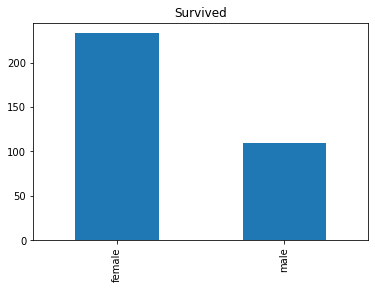

In [13]:
df[df['Survived']==1].Sex.value_counts().plot(kind='bar')
plt.title('Survived')
plt.show()

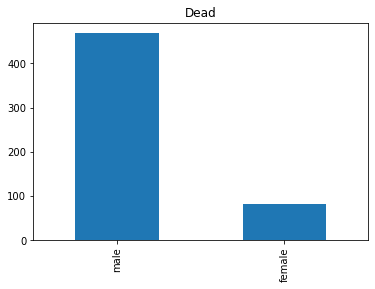

In [14]:
df[df['Survived']==0].Sex.value_counts().plot(kind='bar')
plt.title('Dead')
plt.show()

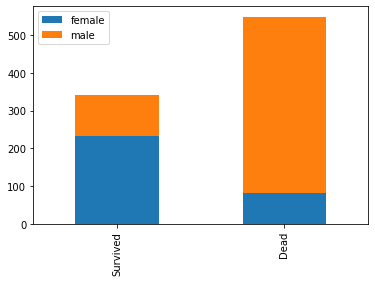

In [15]:
survived=df[df['Survived']==1].Sex.value_counts()
dead=df[df['Survived']==0].Sex.value_counts()
df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)

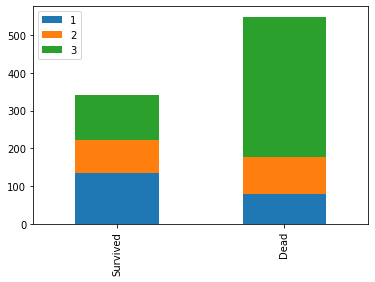

In [16]:
survived=df[df['Survived']==1].Pclass.value_counts()
dead=df[df['Survived']==0].Pclass.value_counts()
df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)

In [17]:
df[df.Survived==1].Fare.agg(['mean','median','max','min','count'])

mean       48.395408
median     26.000000
max       512.329200
min         0.000000
count     342.000000
Name: Fare, dtype: float64

In [18]:
df[df.Survived==0].Fare.agg(['mean','median','max','min','count'])

mean       22.117887
median     10.500000
max       263.000000
min         0.000000
count     549.000000
Name: Fare, dtype: float64

In [19]:
df[df.Fare<50].Fare.agg(['mean','median','max','min','count'])

mean       15.500598
median     11.133300
max        49.504200
min         0.000000
count     730.000000
Name: Fare, dtype: float64

Text(0, 0.5, 'No. of Persons')

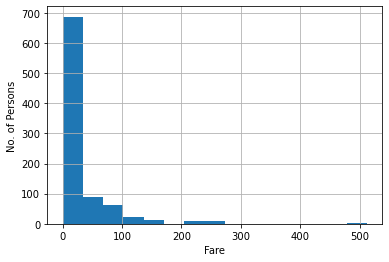

In [20]:
df.Fare.hist(bins=15)
plt.xlabel('Fare')
plt.ylabel('No. of Persons')

In [21]:
df.Age.agg(['mean','median','max','min','count'])

mean       29.699118
median     28.000000
max        80.000000
min         0.420000
count     714.000000
Name: Age, dtype: float64

In [22]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

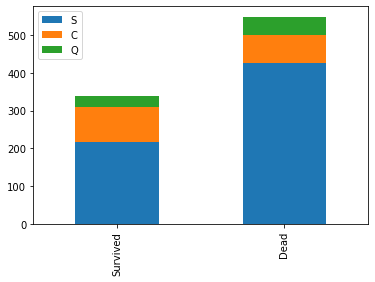

In [23]:
survived=df[df['Survived']==1].Embarked.value_counts()
dead=df[df['Survived']==0].Embarked.value_counts()
df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)

In [24]:
df.fillna({'Age':df.Age.median(),
          'Embarked':df.Embarked.value_counts().index[0]},inplace=True)

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 1st class more likely survivied than other classes

#### 3rd class more likely dead than other classes

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
df_1 = df.loc[:,['Pclass','Sex','Age','Fare','Embarked']]

In [28]:
df_1.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


### label encoding
### one hot encoding

In [29]:
#df_1.head()

In [30]:
#f_1.Sex=df_1.Sex.map({"male": 0, "female": 1})  #label encoding
df_new = pd.get_dummies(df_1[df_1.columns])

In [31]:
df_new.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1


In [32]:
X = df_new.values

In [33]:
y = df.Survived.values

In [34]:
X.shape

(891, 8)

In [35]:
y.shape

(891,)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.20,random_state=0)

# Logistic model 

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)



C:\Users\KapilMangla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test,test_pred)

0.7988826815642458

In [41]:
confusion_matrix(Y_test,test_pred)

array([[92, 18],
       [18, 51]], dtype=int64)